<a href="https://colab.research.google.com/github/geraldoaax/ciclo_detalhado_ml/blob/main/ciclo_detalhado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [16]:
ciclo_df = pd.read_excel('/content/ciclo_detalhado.xlsx')
ciclo_df.reset_index(drop = True, inplace = True)

In [5]:
ciclo_df

,Tag,CicloID,Ano,Mês,Dia,Hora Início,Hora Fim,Turno,Turma,Classificação,...,Descarga,Ciclo,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Tipo Input,Obs,Ciclo Válido
0,CMB-1,CMB1-202305041210180000,2023,5,4,04/05/2023 11:45:44,04/05/2023 12:10:18,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:24:16,00:24:34,0.00,0.00,0.00,888,30,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
1,CMB-1,CMB1-202305041211490000,2023,5,4,04/05/2023 12:10:18,04/05/2023 12:11:49,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:21,00:01:31,0.00,0.00,0.00,888,30,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
2,CMB-1,CMB1-202305041337150000,2023,5,4,04/05/2023 12:11:49,04/05/2023 13:37:15,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:23,01:25:26,0.00,0.00,0.00,888,40,EMBARCADO,Alocado pelo Controle por arrastar e soltar,0
3,CMB-1,CMB1-202305041404140000,2023,5,4,04/05/2023 13:37:15,04/05/2023 14:04:14,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:27,00:26:59,0.00,0.00,0.00,CORRE,40,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
4,CMB-1,CMB1-202305041406290000,2023,5,4,04/05/2023 14:04:14,04/05/2023 14:06:29,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:26,00:02:15,0.00,0.00,0.00,CORRE,39,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,CM-1,CM1-202305181529300000,2023,5,18,18/05/2023 15:28:56,18/05/2023 15:29:30,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:06,00:00:34,0.51,0.00,0.24,NaN,40,EMBARCADO,Alocado pelo Controle,1
953,CMBA-2,CMBA2-202305181531100000,2023,5,18,17/05/2023 15:02:27,18/05/2023 15:31:10,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:14,00:28:43,2.14,0.00,0.00,0,40,EMBARCADO,Alocado pelo Controle,1
954,CMBA-2,CMBA2-202305181531470000,2023,5,18,18/05/2023 15:31:10,18/05/2023 15:31:47,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:08,00:00:37,0.00,0.00,0.00,0,40,EMBARCADO,Alocado pelo Controle,1
955,CMBA-2,CMBA2-202305181532590000,2023,5,18,18/05/2023 15:31:47,18/05/2023 15:32:59,TURNO 01 - 2023,B,EQUIPAMENTO DE TRANSPORTE,...,00:00:11,00:01:12,0.54,2.46,1.48,0,40,EMBARCADO,Alocado pelo Controle,1


In [17]:
ciclo_df.head(10)

,Tag,CicloID,Ano,Mês,Dia,Hora Início,Hora Fim,Turno,Turma,Classificação,...,Descarga,Ciclo,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Tipo Input,Obs,Ciclo Válido
0,CB-4102,CB4102-202305010139410000,2023,5,1,01/05/2023 00:55:38,01/05/2023 01:39:41,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:00:53,00:44:03,6.60,11.59,8.31,0,36,EMBARCADO,Alocado pelo Controle,1
1,CB-4104,CB4104-202305010142450000,2023,5,1,30/04/2023 22:07:51,01/05/2023 01:42:45,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:00:02,01:15:47,3213.90,4.91,16.54,0,36,EMBARCADO,Alocado pelo Controle,0
2,CB-4104,CB4104-202305010144410000,2023,5,1,01/05/2023 01:42:45,01/05/2023 01:44:41,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:00:02,00:01:56,0.00,0.00,0.00,0,36,EMBARCADO,Alocado pelo Controle,1
3,CB-4106,CB4106-202305010146580000,2023,5,1,01/05/2023 00:58:53,01/05/2023 01:46:58,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:01:12,00:48:05,9.12,10.54,9.51,0,36,EMBARCADO,Alocado pelo Controle,1
4,CB-3944,CB3944-202305010150050000,2023,5,1,01/05/2023 01:36:55,01/05/2023 01:50:05,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:01:20,00:13:10,6.83,13.29,10.90,0,36,EMBARCADO,Alocado pelo Controle,1
5,CB-3963,CB3963-202305010153450000,2023,5,1,01/05/2023 01:42:17,01/05/2023 01:53:45,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:01:38,00:11:28,7.30,11.22,10.44,0,36,EMBARCADO,Alocado pelo Controle,1
6,CB-4102,CB4102-202305010156440000,2023,5,1,01/05/2023 01:39:41,01/05/2023 01:56:44,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:01:27,00:17:03,23.04,10.91,14.61,0,36,EMBARCADO,Alocado pelo Controle,1
7,CB-4105,CB4105-202305010200540000,2023,5,1,01/05/2023 01:00:50,01/05/2023 02:00:54,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:01:17,00:26:15,5.37,14.21,6.93,0,36,EMBARCADO,Alocado pelo Controle por arrastar e soltar,0
8,CB-4106,CB4106-202305010204040000,2023,5,1,01/05/2023 01:46:58,01/05/2023 02:04:04,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:00:58,00:17:06,33.59,10.80,17.93,0,36,EMBARCADO,Alocado pelo Controle,1
9,CB-3944,CB3944-202305010210060000,2023,5,1,01/05/2023 01:50:05,01/05/2023 02:10:06,TURNO 2,C,EQUIPAMENTO DE TRANSPORTE,...,00:01:36,00:20:01,4.96,10.54,6.61,0,36,EMBARCADO,Alocado pelo Controle,1


In [18]:
ciclo_df.tail(10)

,Tag,CicloID,Ano,Mês,Dia,Hora Início,Hora Fim,Turno,Turma,Classificação,...,Descarga,Ciclo,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Tipo Input,Obs,Ciclo Válido
5043,CB-4104,CB4104-202305201052000000,2023,5,20,20/05/2023 10:29:59,20/05/2023 10:52:00,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:02:06,00:22:01,10.12,11.18,10.64,0,36,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
5044,CB-3207,CB3207-202305201053260000,2023,5,20,20/05/2023 10:28:44,20/05/2023 10:53:26,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:01:18,00:24:42,25.70,12.21,16.65,0,23,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
5045,CB-4103,CB4103-202305201104370000,2023,5,20,20/05/2023 10:45:03,20/05/2023 11:04:37,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:02:10,00:10:06,11.74,8.06,9.10,0,36,EMBARCADO,Alocado pela troca de atividade da maquina de ...,0
5046,CB-4106,CB4106-202305201108110000,2023,5,20,20/05/2023 10:49:33,20/05/2023 11:08:11,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:00:52,00:18:38,24.70,6.16,10.91,0,36,EMBARCADO,Alocado pela troca de atividade da maquina de ...,1
5047,CB-4104,CB4104-202305201116470000,2023,5,20,20/05/2023 10:52:00,20/05/2023 11:16:47,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:01:07,00:23:20,8.51,10.33,9.30,0,36,EMBARCADO,Alocado pelo Controle por arrastar e soltar,0
5048,CB-3207,CB3207-202305201119240000,2023,5,20,20/05/2023 10:53:26,20/05/2023 11:19:24,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:01:06,00:25:58,26.85,14.16,18.40,0,23,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
5049,CB-4101,CB4101-202305201121070000,2023,5,20,20/05/2023 10:43:13,20/05/2023 11:21:07,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:02:00,00:37:54,8.27,11.22,9.96,0,36,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
5050,CB-4101,CB4101-202305201130260000,2023,5,20,20/05/2023 11:21:07,20/05/2023 11:30:26,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:00:21,00:09:19,404.10,7.93,19.01,0,36,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
5051,CB-3207,CB3207-202305201158100000,2023,5,20,20/05/2023 11:19:24,20/05/2023 11:58:10,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:01:56,00:38:46,48.98,22.55,32.67,0,23,EMBARCADO,Alocado pelo Controle por arrastar e soltar,1
5052,CB-4106,CB4106-202305201158240000,2023,5,20,20/05/2023 11:08:11,20/05/2023 11:58:24,TURNO 1,A,EQUIPAMENTO DE TRANSPORTE,...,00:02:40,00:37:11,5.93,14.97,10.00,0,36,EMBARCADO,Alocado pelo Controle por arrastar e soltar,0


In [19]:
ciclo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tag                           5053 non-null   object 
 1   CicloID                       5053 non-null   object 
 2   Ano                           5053 non-null   int64  
 3   Mês                           5053 non-null   int64  
 4   Dia                           5053 non-null   int64  
 5   Hora Início                   5051 non-null   object 
 6   Hora Fim                      5053 non-null   object 
 7   Turno                         5053 non-null   object 
 8   Turma                         5053 non-null   object 
 9   Classificação                 5053 non-null   object 
 10  Frota                         5053 non-null   object 
 11  Setor Designado               5053 non-null   object 
 12  Operador                      5053 non-null   object 
 13  Tag

In [23]:
ciclo_df.describe()

,Ano,Mês,Dia,Densidade,Distância vazio (Metros),Distância cheio (Metros),Distância planejada (Metros),DMT. Ciclo (Metros),Distância Total (Metros),Dist. cheio por vazio,Vel. Vazio KM/H,Vel. Cheio KM/H,Vel. Média KM/H,Fogo,Massa / Produção,Ciclo Válido
count,5053.0,5053.0,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5053.000000,5051.000000,5051.000000,5049.000000,5053.0,5053.000000,5053.000000
mean,2023.0,5.0,9.681377,0.928359,1251.080546,908.784682,1142.905007,1126.758361,2253.516723,1.756883,33.932322,16.254451,21.273149,0.0,34.598456,0.750841
std,0.0,0.0,5.569275,0.257917,1207.701960,740.075346,646.417052,753.002822,1506.005643,17.099138,273.182479,136.893102,150.204166,0.0,4.149146,0.432569
min,2023.0,5.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,22.000000,0.000000
25%,2023.0,5.0,5.000000,1.000000,610.000000,471.000000,500.000000,715.000000,1430.000000,0.380000,7.240000,7.820000,8.090000,0.0,36.000000,1.000000
50%,2023.0,5.0,9.000000,1.000000,1005.000000,830.000000,1000.000000,985.500000,1971.000000,0.830000,13.880000,11.530000,12.390000,0.0,36.000000,1.000000
75%,2023.0,5.0,14.000000,1.000000,1549.000000,1218.000000,1500.000000,1410.000000,2820.000000,1.130000,22.180000,15.290000,16.900000,0.0,36.000000,1.000000
max,2023.0,5.0,20.000000,1.000000,18534.000000,21834.000000,2500.000000,15082.500000,30165.000000,723.000000,13597.200000,8981.100000,6798.600000,0.0,40.000000,1.000000


In [56]:
count_data = ciclo_df.groupby('Dia')['CicloID'].count().reset_index()
count_data['Dia'] = count_data['Dia'].round().astype(int)
count_data

,Dia,CicloID
0,1,263
1,2,320
2,3,285
3,4,252
4,5,272
5,6,340
6,7,310
7,8,269
8,9,261
9,10,293


Text(0.5, 1.0, 'Count of CicloID by Dia')

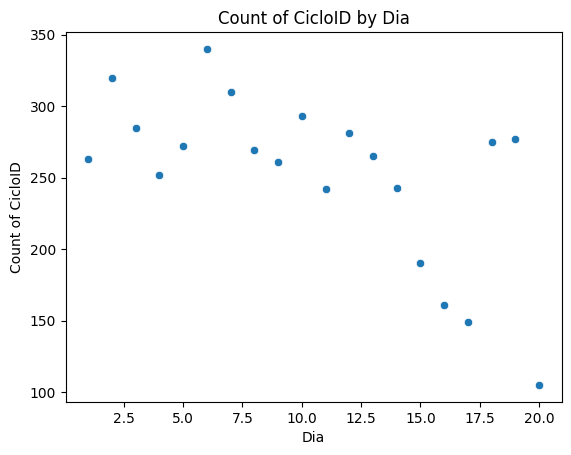

In [57]:
sns.scatterplot(x=count_data['Dia'], y=count_data['CicloID'])
plt.xlabel('Dia')
plt.ylabel('Count of CicloID')
plt.title('Count of CicloID by Dia')

In [26]:
X_train = count_data['Dia']
y_train = count_data['CicloID']

In [27]:
X_train

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Dia, dtype: int64

In [28]:
y_train


0     263
1     320
2     285
3     252
4     272
5     340
6     310
7     269
8     261
9     293
10    242
11    281
12    265
13    243
14    190
15    161
16    149
17    275
18    277
19    105
Name: CicloID, dtype: int64

In [29]:
X_train.shape


(20,)

In [30]:
y_train.shape


(20,)

# Construção do modelo sequencial

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 40, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                80        
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')


In [43]:
epochs_hist = model.fit(X_train, y_train, epochs = 400)


Epoch 1/400
1/1 [==============================] - 1s 564ms/step - loss: 67631.9453
Epoch 2/400
1/1 [==============================] - 0s 9ms/step - loss: 59570.6133
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 51896.1562
Epoch 4/400
1/1 [==============================] - 0s 10ms/step - loss: 43975.2422
Epoch 5/400
1/1 [==============================] - 0s 8ms/step - loss: 35990.9297
Epoch 6/400
1/1 [==============================] - 0s 11ms/step - loss: 28908.9492
Epoch 7/400
1/1 [==============================] - 0s 11ms/step - loss: 24349.3789
Epoch 8/400
1/1 [==============================] - 0s 8ms/step - loss: 23988.0508
Epoch 9/400
1/1 [==============================] - 0s 10ms/step - loss: 27521.6250
Epoch 10/400
1/1 [==============================] - 0s 10ms/step - loss: 30859.2715
Epoch 11/400
1/1 [==============================] - 0s 9ms/step - loss: 30959.2129
Epoch 12/400
1/1 [==============================] - 0s 15ms/step - loss: 28472.9883
Epoch

In [44]:
epochs_hist.history.keys()

dict_keys(['loss'])

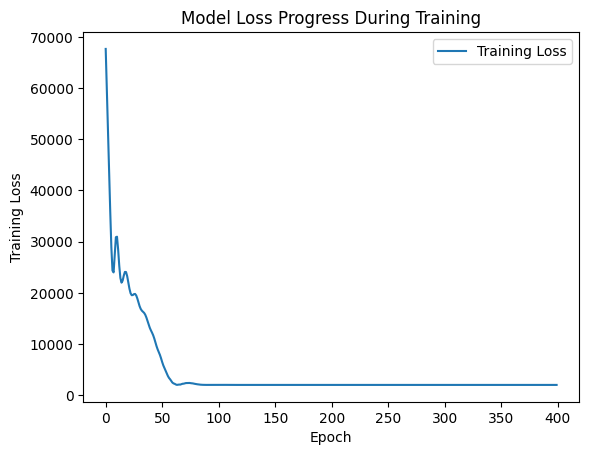

In [45]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [46]:
model.get_weights()

[array([[ 0.09849948, -0.45151618, -0.7182122 ,  0.94026107,  0.83942974,
         -0.60768425,  0.36983612,  0.52532446,  0.31868726, -0.39716637,
         -0.65045184, -0.33754188,  0.85464174,  0.03728555, -0.07919426,
          0.00362156, -0.58202344, -0.11237147, -0.53885716, -0.6938623 ,
         -0.3246494 ,  0.0084347 , -0.38559178,  0.30079877,  0.25180402,
         -0.26254228,  0.32754368,  0.03531982, -0.40612236,  0.5149526 ,
          0.05029337,  0.12640336,  0.92473876, -0.26184782, -0.77883446,
         -0.23938261,  0.826045  ,  0.5400682 ,  0.17007495,  0.45283824]],
       dtype=float32),
 array([-5.232575 , -5.0837793,  3.4521306, -3.3284657, -4.1596055,
         3.0684197,  4.9807124, -5.2916007,  4.9645214,  2.0459545,
         5.6609993, -5.2615604, -5.6153364,  5.3840756, -5.461675 ,
         5.475942 , -5.099749 ,  5.486256 , -5.017716 ,  4.3296523,
        -4.8986545,  5.1292987, -5.175519 , -3.5620904,  5.4264493,
        -5.0338974,  5.3659835,  2.4824014,

In [51]:
# Previsões com o modelo treinado
day = 30
production = model.predict([day])
print('Cicle by day Using Trained ANN =', production)

1/1 [==============================] - 0s 37ms/step
Cicle by day Using Trained ANN = [[131.35411]]


SK

In [58]:
X_train.shape


(20,)

In [59]:
X_train = X_train.values.reshape(-1,1)

In [60]:
X_train.shape

(20, 1)

In [61]:
y_train = y_train.values.reshape(-1,1)

In [62]:
y_train.shape

(20, 1)

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
regressor.coef_

array([[-6.22030075]])

In [66]:
regressor.intercept_

array([317.96315789])

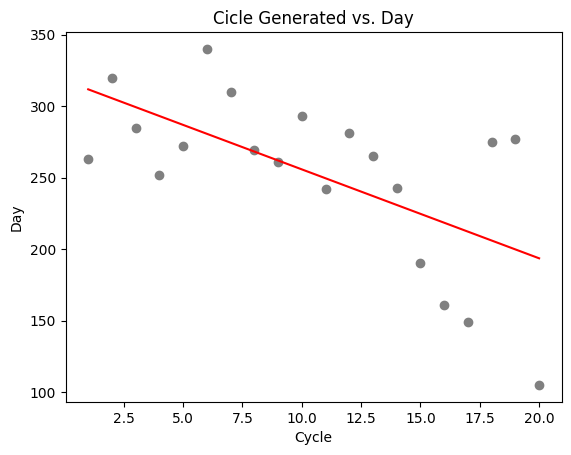

In [67]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Day')
plt.xlabel('Cycle')
plt.title('Cicle Generated vs. Day');